In [2]:
from pykrx import stock
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = stock.get_market_ohlcv_by_date("20200425", "20210325", "035420")
df.tail()  #  네이버 주가 정보 출력

,시가,고가,저가,종가,거래량
날짜,,,,,
2021-03-19,397000,407500,394999,402000,1258199
2021-03-22,402500,405500,393000,396500,911358
2021-03-23,396999,399000,384000,386000,1167110
2021-03-24,380000,387000,376000,387000,763754
2021-03-25,381500,384000,378000,380000,672585


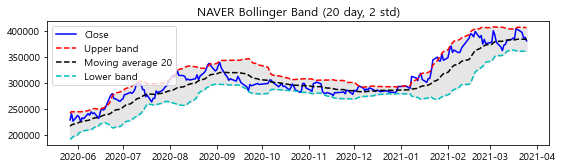

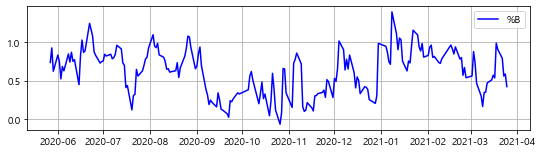

In [4]:
import matplotlib.pyplot as plt

  
df['MA20'] = df['종가'].rolling(window=20).mean()       # 중간 볼린저 밴드
df['stddev'] = df['종가'].rolling(window=20).std() 
df['upper'] = df['MA20'] + (df['stddev'] * 2)           # 상단 볼린저 밴드
df['lower'] = df['MA20'] - (df['stddev'] * 2)           # 하단 볼린저 밴드
df['PB'] = (df['종가']-df['lower'])/(df['upper']-df['lower'])    # %b
df = df[19:]  

plt.figure(figsize=(9, 5))
plt.subplot(2,1,1)
plt.plot(df.index, df['종가'], color='#0000ff', label='Close')    
plt.plot(df.index, df['upper'], 'r--', label = 'Upper band')       
plt.plot(df.index, df['MA20'], 'k--', label='Moving average 20')
plt.plot(df.index, df['lower'], 'c--', label = 'Lower band')

plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')     # 상단 하단 사이 회색칠
plt.legend(loc='best')
plt.title('NAVER Bollinger Band (20 day, 2 std)')
plt.show()

plt.figure(figsize=(9, 5))
plt.subplot(2, 1, 2)  
plt.plot(df.index, df['PB'], color='b', label='%B') 
plt.grid(True)
plt.legend(loc='best')
plt.show()

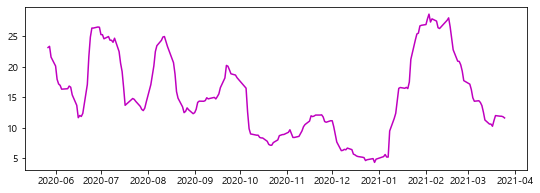

In [5]:
# 밴드폭 시각화
# 밴드폭 = (상단 볼린저밴드 - 하단 볼린저 밴드) / 중간 볼린저 밴드 

df['bandwidth'] = (df['upper'] - df['lower']) / df['MA20'] * 100    
plt.figure(figsize=(9,3))
plt.plot(df.index, df['bandwidth'], color='m', label='BandWidth')

In [6]:
df = stock.get_market_ohlcv_by_date("20200425", "20210325", "035420")  # 네이버주가 데이터 refresh

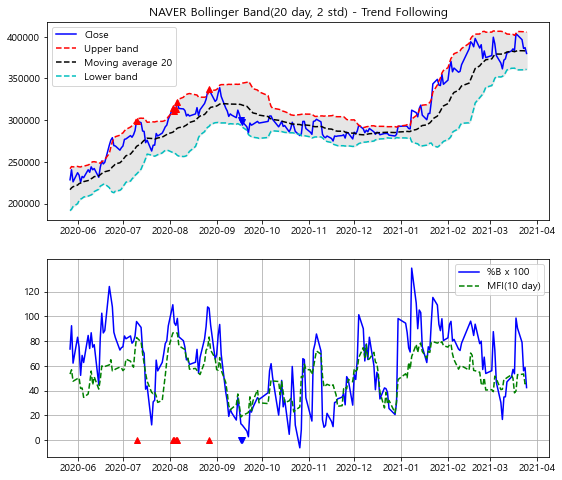

In [7]:
import matplotlib.pyplot as plt
  
df['MA20'] = df['종가'].rolling(window=20).mean() 
df['stddev'] = df['종가'].rolling(window=20).std() 
df['upper'] = df['MA20'] + (df['stddev'] * 2)
df['lower'] = df['MA20'] - (df['stddev'] * 2)
df['PB'] = (df['종가'] - df['lower']) / (df['upper'] - df['lower'])    # %b
df['TP'] = (df['고가'] + df['저가'] + df['종가']) / 3                  # 고가,저가,종가의 평균으로 중심 가격 구하기         
df['PMF'] = 0
df['NMF'] = 0


for i in range(len(df.종가)-1):
    if df.TP.values[i] < df.TP.values[i+1]:                             # 긍정적 현금흐름
        df.PMF.values[i+1] = df.TP.values[i+1] * df.거래량.values[i+1]
        df.NMF.values[i+1] = 0
    else:
        df.NMF.values[i+1] = df.TP.values[i+1] * df.거래량.values[i+1]    # 부정적 현금흐름
        df.PMF.values[i+1] = 0
df['MFR'] = (df.PMF.rolling(window=10).sum() /             # 긍정적 현금흐름/부정적 현금흐름
    df.NMF.rolling(window=10).sum())
df['MFI10'] = 100 - 100 / (1 + df['MFR'])                  # MFI공식적용

df = df[19:]

plt.figure(figsize=(9, 8))
plt.subplot(2, 1, 1)
plt.title('NAVER Bollinger Band(20 day, 2 std) - Trend Following')
plt.plot(df.index, df['종가'], color='#0000ff', label='Close')
plt.plot(df.index, df['upper'], 'r--', label ='Upper band')
plt.plot(df.index, df['MA20'], 'k--', label='Moving average 20')
plt.plot(df.index, df['lower'], 'c--', label ='Lower band')
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')
for i in range(len(df.종가)):
    if df.PB.values[i] > 0.8 and df.MFI10.values[i] > 80:       # %b가 0.8보다크고 MFI가 80보다 크면 매수표시
        plt.plot(df.index.values[i], df.종가.values[i], 'r^')    
    elif df.PB.values[i] < 0.2 and df.MFI10.values[i] < 20:     # %b가 0.2보다작고 MFI가 20보다 작으면 매도표시
        plt.plot(df.index.values[i], df.종가.values[i], 'bv')  
plt.legend(loc='best')

plt.subplot(2, 1, 2)
plt.plot(df.index, df['PB'] * 100, 'b', label='%B x 100')       # %b 푸른색
plt.plot(df.index, df['MFI10'], 'g--', label='MFI(10 day)')     # MFI 녹색 점선
plt.yticks([-20, 0, 20, 40, 60, 80, 100, 120])                  
for i in range(len(df.종가)):
    if df.PB.values[i] > 0.8 and df.MFI10.values[i] > 80:
        plt.plot(df.index.values[i], 0, 'r^')
    elif df.PB.values[i] < 0.2 and df.MFI10.values[i] < 20:
        plt.plot(df.index.values[i], 0, 'bv')
plt.grid(True)
plt.legend(loc='best')
plt.show();   

In [8]:
df = stock.get_market_ohlcv_by_date("20200425", "20210325", "035420")  # 네이버주가 데이터 refresh

C:\Users\Owner\.conda\envs\test\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Owner\.conda\envs\test\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


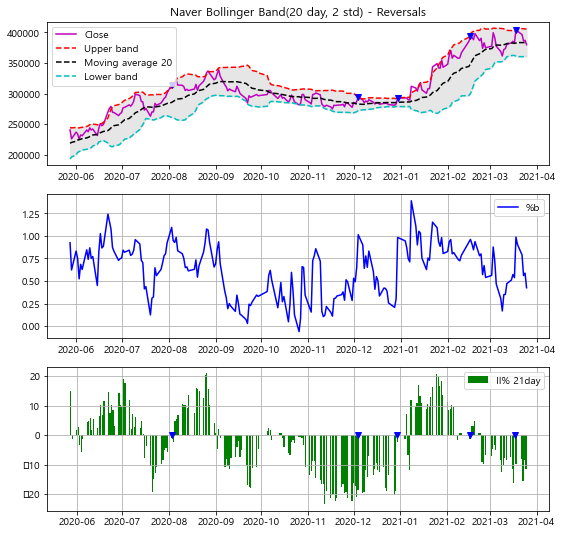

In [9]:
import matplotlib.pyplot as plt
  
df['MA20'] = df['종가'].rolling(window=20).mean() 
df['stddev'] = df['종가'].rolling(window=20).std() 
df['upper'] = df['MA20'] + (df['stddev'] * 2)
df['lower'] = df['MA20'] - (df['stddev'] * 2)
df['PB'] = (df['종가'] - df['lower']) / (df['upper'] - df['lower'])

df['II'] = (2*df['종가']-df['고가']-df['저가'])/(df['고가']-df['저가'])*df['거래량']
df['IIP21'] = df['II'].rolling(window=21).sum()/df['거래량'].rolling(window=21).sum()*100       #II% 식 적용
df = df.dropna()

plt.figure(figsize=(9, 9))
plt.subplot(3, 1, 1)
plt.title('Naver Bollinger Band(20 day, 2 std) - Reversals')
plt.plot(df.index, df['종가'], 'm', label='Close')
plt.plot(df.index, df['upper'], 'r--', label ='Upper band')
plt.plot(df.index, df['MA20'], 'k--', label='Moving average 20')
plt.plot(df.index, df['lower'], 'c--', label ='Lower band')
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')
for i in range(0, len(df.종가)):
    if df.PB.values[i] < 0.05 and df.IIP21.values[i] > 0:       # %b 0.05보다 작고 II%가 0보다 크면 매수
        plt.plot(df.index.values[i], df.종가.values[i], 'r^')  
    elif df.PB.values[i] > 0.95 and df.IIP21.values[i] < 0:     # %b 0.95보다 크고 II%가 0보다 작으면 매도
        plt.plot(df.index.values[i], df.종가.values[i], 'bv')  
plt.legend(loc='best')

plt.subplot(3, 1, 2)
plt.plot(df.index, df['PB'], 'b', label='%b')
plt.grid(True)
plt.legend(loc='best')

plt.subplot(3, 1, 3)
plt.bar(df.index, df['IIP21'], color='g', label='II% 21day')
for i in range(0, len(df.종가)):
    if df.PB.values[i] < 0.05 and df.IIP21.values[i] > 0:
        plt.plot(df.index.values[i], 0, 'r^') # ⑤
    elif df.PB.values[i] > 0.95 and df.IIP21.values[i] < 0:
        plt.plot(df.index.values[i], 0, 'bv') # ⑥
plt.grid(True)
plt.legend(loc='best')
plt.show()